In [1]:
import util
import NMF
import chord
import NoteTemplate

import numpy as np
import warnings
warnings.simplefilter("ignore")

"PianoChord-70bpm.wav"のコードを解析してみます。

In [2]:
import IPython.display
IPython.display.Audio("PianoChord-70bpm.wav")

1. ピアノ音のテンプレートを、ノート音声から学習します。(ここではＣ１からＢ４までの４オクターブに限定します)

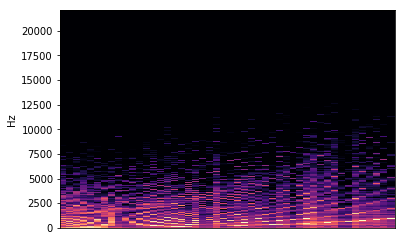

In [3]:
W = NoteTemplate.getNoteTemplates("audio_notes")
util.PlotTemplates(W)

2. コード解析したい音声をスペクトログラムに変換します。

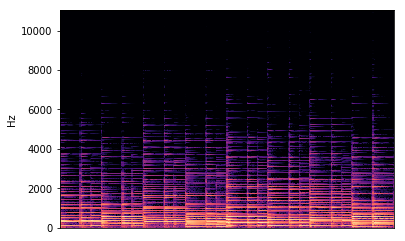

In [4]:
S = util.LoadAudio("PianoChord-70bpm.wav")
util.PlotSpec(S[:1024,:])

3. 行列Ｗを固定し、ＮＭＦアルゴリズムで行列Ｈを推定します。

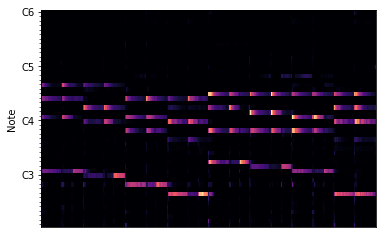

In [5]:
_,H = NMF.nmf_beta(S,48,W.T,beta=0.5,iteration=50)
util.PlotPianoroll(H)

(しきい値でＨを二値化してみます)

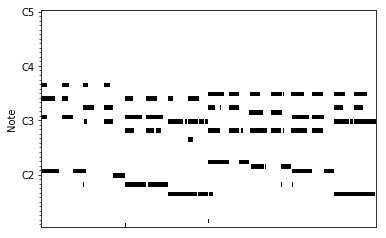

In [9]:
H_binary = (H / np.max(H)) > 0.2
util.PlotPianoroll(H_binary)

4. Ｈをビート単位で分割して、それぞれのコードを判定します。

In [7]:
segments = [np.sum(seg,axis=1) for seg in util.SegmentByBeat(H,70,4*4)]
chords = [chord.match_chord(seg/seg.max()) for seg in segments]

In [8]:
chords

['C:',
 'C:',
 'G:/B',
 'G:/B',
 'A:min',
 'A:min',
 'E:min/G',
 'E:min/G',
 'D:min',
 'D:min',
 'C#:aug',
 'C#:aug',
 'F:/C',
 'F:/C',
 'G:7',
 'G:7']